In [1]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

# Sklearn models
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metrics
from sklearn.metrics import mean_squared_error

### Introduction
This is a Kaggle project targeting to predict the house price in Ames. We will go through the full data science pipeline from data wrangling to EDA and modeling. The original post and the data set can be found at https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Data loading and cleaning

In [2]:
# load both the train and test data set
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
test_ID = test_set['Id']

In [3]:
# check on dimensions
print(train_set.shape, test_set.shape)

(1460, 81) (1459, 80)


In [4]:
# Combine the train and test data set before data wrangling
full_set = train_set.merge(test_set, how = 'outer')

In [5]:
# Remove the Id column
full_set.drop('Id', axis = 1, inplace = True)

In [6]:
# use descrbie() to get more insight of the data distribution
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


From the description, we notice some outliers such as extremely large LotFontage. However, it might be possible for some super mansions. Let's keep them for now. One outlier that is wrong for sure is the 2207 in the GarageYrBlt. It is very likely that this value should be 2007 instead. Let's replace it

In [7]:
full_set.GarageYrBlt.replace(2207,2007, inplace = True)

Now try to deal with the missing value by first checking which columns have the missing value

In [8]:
# list down the missing value and its percentage 
missing = pd.concat([full_set.isna().sum(), full_set.isna().sum()/len(full_set)], axis = 1)
missing.columns = ['# of NaN','Percentage']
missing.sort_values('Percentage',ascending = False, inplace = True)
missing.head(40)

,# of NaN,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


Some missing values actually mean that the house doesn't have that specific features. We can replace those missing values with None

In [9]:
# The list of the meaningful missing values
None_list = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageCond','GarageType','GarageType','GarageQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']

# Replace the missing value with None
for feature in None_list:
    full_set[feature].fillna('None', inplace = True)

Some missing values can be replaced by 0 to indicate that the house doesn't have that specific features

In [10]:
# Replace the following missing value with 0
no_such_feature = ['GarageYrBlt','GarageArea','MasVnrArea','GarageCars','BsmtHalfBath','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF']

full_set.update(full_set[no_such_feature].fillna(0))

For the missing values in LotFrontage, let's replace it with the mean value in the specific neighborhood the house belongs. Note that we want to use the mean from the traning set only in order to prevent data leakage

In [11]:
# create the lot mean for each neighborhood based on the training set
lot_mean = train_set.groupby('Neighborhood')['LotFrontage'].mean()
neighbor_list = list(full_set.Neighborhood.unique())

# replace the missing value in LotFrontage in the full data set by the lot mean
for neighbor in neighbor_list:
    mask = full_set['Neighborhood'] == neighbor
    full_set.loc[mask, 'LotFrontage'] = full_set.loc[mask, 'LotFrontage'].fillna(value = lot_mean[neighbor])

For the rest of the missing values, replace them with the most common value in its corresponding neighborhood

In [12]:
# Replace the missing values in the list below with the most common value
common_list = ['MSZoning','Utilities','Functional','KitchenQual','Exterior2nd','Exterior1st','SaleType','Electrical']

for feature in common_list:
    full_set[feature] = full_set.groupby('Neighborhood')[feature].transform(lambda x: x.fillna(x.mode()[0]))

In [13]:
# Replace the NA in Functional by Typ
full_set['Functional'] = full_set['Functional'].fillna('Typ')

In [14]:
# Check the dataset again to make sure all the missing values have been dealt with
full_set.isna().sum().sort_values(ascending = False)

SalePrice        1459
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
                 ... 
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
MSSubClass          0
Length: 80, dtype: int64

It may make more sense if we convert YearBuilt to the age of the house and the age of the house, let's create new feature for them

In [15]:
# create new feature for the age of the house
full_set['HouseAge'] = 2016 - full_set['YearBuilt']
# drop the YearBuilt axis since it is replaced by the HouseAge
full_set = full_set.drop('YearBuilt',axis = 1)

Convert some numerical features that are actually categorical features

In [16]:
# list of variables that should be categorical variables
to_cat = ['MSSubClass','OverallCond','MoSold','YrSold']
full_set[to_cat] = full_set[to_cat].astype('str')

In [17]:
# review the cleaned data set
full_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500.0,13
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500.0,40
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500.0,15
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000.0,101
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000.0,16


### Exploratory data analysis

Quickly take a look at the histogram for all the numerical parameters

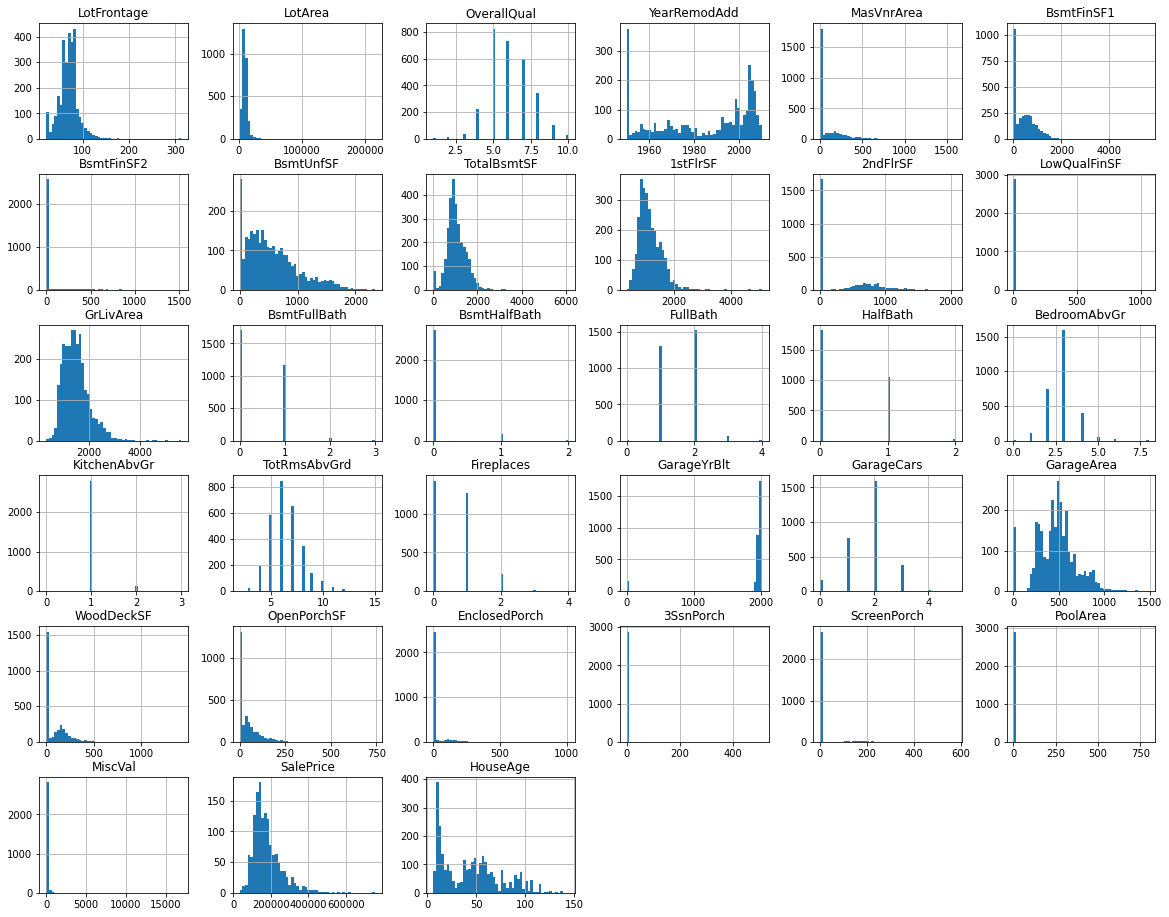

In [18]:
_= full_set.hist(bins = 50, figsize = (20,16))

Some data show skew and we may need to do log transform later. Some data show possible outliers. Will need to take a look later

Now let's be a little more quatitative and take a look at the correlation between each paramter

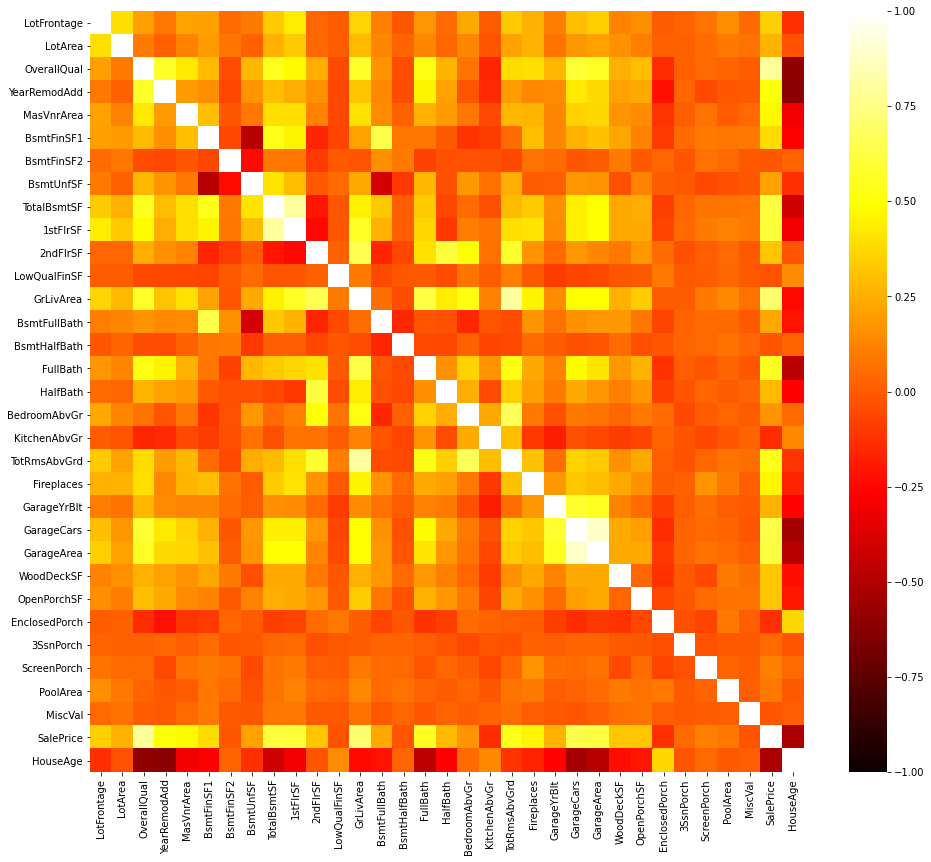

In [19]:
# plot the heatmap for the variables
corr = full_set.corr()
plt.figure(figsize=(16,14))
_= sns.heatmap(corr, cmap = 'hot',vmin = -1)

From the heatmap, we can see some variables are highly correlated with each other. For example TotalBsmtSF has high correlation with 1stFlrSF. This is understandable since the basement area should be very close to the first floor area. Similarly, GarageCars has high correlation to GarageArea since we need more garage area if we want to park more cars. We may only need to consider a single variable instead of two highly correlated variables during modeling stage. We could drop TotalBsmtSF and GarageCars in the future.

In [20]:
# Let's simply drop TotalBsmtSF and GarageCars for now
full_set = full_set.drop(['TotalBsmtSF','GarageCars'], axis = 1)

In [21]:
# get the actual correlation values between different variables and the SalePrice
corr = full_set.corr()
cor_list = corr[['SalePrice']].abs().sort_values('SalePrice', ascending = False)
cor_list

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageArea,0.623431
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
HouseAge,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614


SalePrice is highly correlated to the OverallQual of the house and the GrLivArea, which is understandable. Next let's take a look at the scatter plot between different variables and the SalePrice

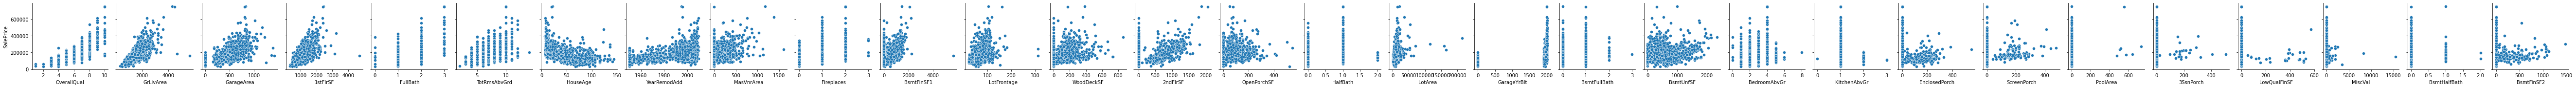

In [22]:
# scatter plot between variables and SalePrice
num_var = cor_list.index
_=sns.pairplot(full_set[num_var],x_vars = num_var[1:], y_vars = 'SalePrice',diag_kind = None)

### Outliers
We can see some outliers for GrLivArea, TotalBsmtSF, 1stFlrSF, BsmtFinSF1, LotFrontage, LotArea, let's remove them

In [23]:
# separate full data set into train and test data before removing outliers
df_train = full_set[~full_set.SalePrice.isnull()]
df_test = full_set[full_set.SalePrice.isnull()]

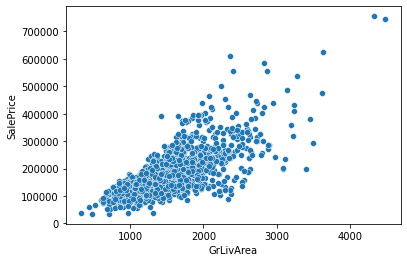

In [24]:
# Remove outliers for GrLivArea
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)
# replot to confirm
_=sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

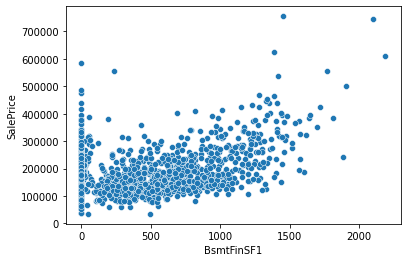

In [25]:
# Remove outlier in BsmtFinSF1
df_train = df_train[df_train['BsmtFinSF1']<4000]
# replot to confirm
_=sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data = df_train)

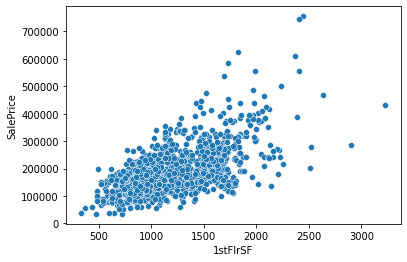

In [26]:
_=sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = df_train)

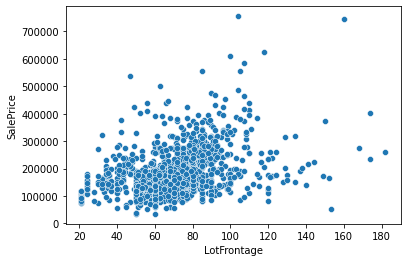

In [27]:
# Remove outliers in LotFrontage
df_train = df_train[df_train['LotFrontage']<300]
_=sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = df_train)

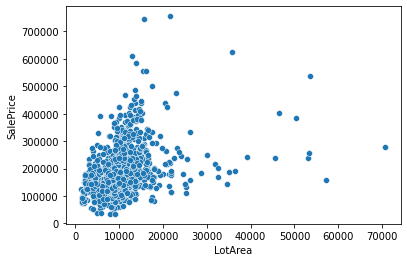

In [28]:
# Remove the outliers in LotArea
df_train = df_train[df_train['LotArea']<100000]
_=sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df_train)

### More visualization with categorical variables

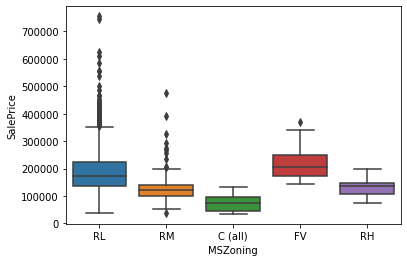

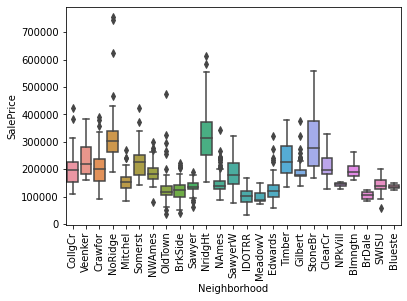

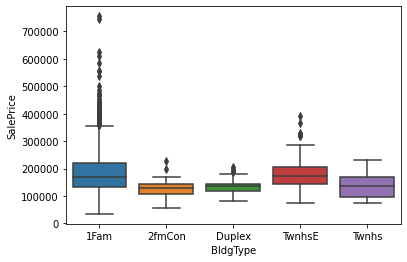

In [29]:
# visualize some categorical data
_ = sns.boxplot(data = df_train, x = 'MSZoning', y = 'SalePrice')
plt.figure()
g = sns.boxplot(data = df_train, x = 'Neighborhood', y = 'SalePrice')
plt.setp(g.get_xticklabels(), rotation=90)
plt.figure()
_= sns.boxplot(data = full_set, x = 'BldgType', y = 'SalePrice')

For examples, MSZoning variable: RL showed more outliers than RM than RH, this may be due to that it is more likely to have mansion style house in the lower residential density region. Neighborhood: different neighborhood also showed different house price. Condition1: adjacent to artery street or railroad normally have lower house price probably due to the noisy enviroment. BldgType: it is more likely to have high sale price for single family style. We can make similar observation and comments for many other variables. It should be more clear in the modeling stage.

### Normality
Next let's check out the normality of the sale price

C:\Users\Yiming Lai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


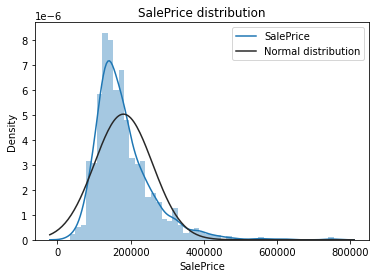

In [30]:
# take a look at the sale price distribution
_ = sns.distplot(df_train['SalePrice'], fit = norm)
plt.title('SalePrice distribution')
plt.legend(['SalePrice','Normal distribution'])
plt.show()

From the histogram we can see the sale price is not normaly distributed and has some positve skew. Let's also get the skewness and kurtosis values

In [31]:
print('Skewness =', df_train.SalePrice.skew(),',Kurtosis =',df_train.SalePrice.kurt())

Skewness = 1.898324553800865 ,Kurtosis = 6.635746715723065


We can do log-transform on the sale price to fix the skew

Skewness = 0.12566253371697333 ,Kurtosis = 0.825891501998921


C:\Users\Yiming Lai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


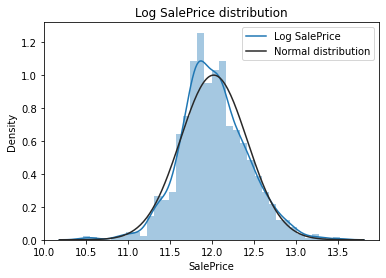

In [32]:
# log tranform on sale price
df_train['SalePrice'] = np.log1p(df_train[['SalePrice']])

# re-check the histogram and QQ-plot
_ = sns.distplot(df_train['SalePrice'], fit = norm)
plt.title('Log SalePrice distribution')
plt.legend(['Log SalePrice','Normal distribution'])

print('Skewness =', df_train.SalePrice.skew(),',Kurtosis =',df_train.SalePrice.kurt())

The sale price distribution is close to normal now

### Categorical variables
Do one hot enconding to convert categorical variables into dummy variables. Before doing that we combine the train data set and the test data set again in order to avoid dimension mismatch after one hot encoding

In [33]:
# recombine training and testing data before doing 1hot encoding
full_set = df_train.merge(df_test, how = 'outer')

# One hot encoding
full_set_1hot = pd.get_dummies(full_set)

# check the shape of the new df_train
print(full_set_1hot.shape)
full_set_1hot.head().T

(2912, 338)


,0,1,2,3,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
OverallQual,7.0,6.0,7.0,7.0,8.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0
...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0


### Modeling

We will try Ridge regression, SVR, random forest and XGBoost to train the model. Let's first divide the data into 80% training set and 20% validation set so that we can evaluate the model performance on the unseen data.

In [34]:
# split the data into training set and validation set
train = full_set_1hot[~full_set_1hot.SalePrice.isnull()]
X = train.drop('SalePrice', axis = 1).values
y = train['SalePrice'].values

# Further split the training data into training set and validation set
kf = KFold(n_splits=10, shuffle=True, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

We can use the GridSearchCV and RandomSearchCV to fine tune the hyperparameters for each model we select. I'll skip the process here since it takes quite some time. One of RandomsearchCV I tried for RandomForest model is show below.

In [35]:
## GridSearchCV for Random Forest

##parameter grid for Random Forest Regressor
#rf_param_grid = {'n_estimators':[200, 500,1000], 'max_depth':[5,10,15,20], 'min_samples_split':[3,5,10],'min_samples_leaf':[3,5,10,15]}
## Set up RandomizedSearchCV
#rf_cv = RandomizedSearchCV(rf, param_distributions = rf_param_grid, n_iter = 35, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
#rf_cv.fit(X_train, y_train)
#rf_best_params = rf_cv.best_params_

## Print the best hyperparameters
#print(rf_best_params)

## Show the score for each parameter set
#rf_cvres = rf_cv.cv_results_
#for mean_score, params in zip(rf_cvres['mean_test_score'], rf_cvres['params']):
#    print(np.sqrt(-mean_score), params)

After hyperparameters tuning, below are the best hyperparameters we got for each model.

In [36]:
# Ridge
ridge_best_params = {'alpha':200}
# Lasso
lasso_best_params = {'alpha': 0.001}
# SVR
svr_best_params = {'C':1}
# Random Forest
rf_best_params = {'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 20}
# XGBoost
xgb_best_params = {'reg_alpha': 0, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.5}

Now we have the best hyperparameters, next we can set up the models. 

In [37]:
# Ridge Regressor
ridge = Pipeline(steps = [('scaler',StandardScaler()), ('ridge',Ridge(alpha=200))])
ridge.fit(X_train, y_train)

# Lasso Regressor
lasso = Pipeline(steps = [('scaler',StandardScaler()), ('lasso',Lasso(alpha=0.001))])
lasso.fit(X_train, y_train)

# SVR
svr = Pipeline(steps = [('scaler',StandardScaler()), ('svr',SVR(C=1))])
svr.fit(X_train, y_train)

# Random Forest Regressor
rf = RandomForestRegressor(random_state = 42,**rf_best_params)
rf.fit(X_train, y_train)

# XGBoost Regressor
xgb = XGBRegressor(objective = 'reg:linear', random_state = 42, verbosity = 0, **xgb_best_params)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [38]:
# Check out the cross validation scores for each model
estimators = [('ridge',ridge),('lasso',lasso),('svr',svr),('rf',rf),('xgb',xgb)]
cv_score = []
for name, model in estimators:
    score = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=kf))
    score = score.mean()
    print('CV score for {}: {}'.format(name, score))

CV score for ridge: 0.12339602590465368
CV score for lasso: 0.12083426213003541
CV score for svr: 0.19386734121196164
CV score for rf: 0.14752168571344093
CV score for xgb: 0.12469032852179818


Lasso gives us the best result, we can check coefficient to get a sense on feature importance

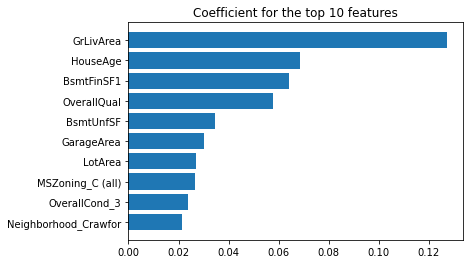

In [39]:
# make a df to list down the coef
importance = pd.DataFrame(lasso.steps[1][1].coef_, columns=['importance'], index = full_set_1hot.drop('SalePrice',axis=1).columns).abs().sort_values('importance',ascending=False)
importance.reset_index(inplace=True)
# Print the top10 features
top10_feature = importance.head(10)

# Plot the top10 features
_= plt.barh(top10_feature['index'], top10_feature['importance'])
_= plt.gca().invert_yaxis()
_= plt.title('Coefficient for the top 10 features')

In addition to the base models, we also set up an ensemble stacking model to reduce overfitting. We use all the base estimators above and use default RidgeCV as the final estimator

In [40]:
# Stacking Regressor
stacking = StackingRegressor(estimators=estimators, cv=kf, n_jobs=-1)
stacking.fit(X_train,y_train)

StackingRegressor(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                  estimators=[('ridge',
                               Pipeline(memory=None,
                                        steps=[('scaler',
                                                StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)),
                                               ('ridge',
                                                Ridge(alpha=200, copy_X=True,
                                                      fit_intercept=True,
                                                      max_iter=None,
                                                      normalize=False,
                                                      random_state=None,
                                                      solver='auto',
                                                     

In [41]:
# Simple loop for predicting the result and summarizing the scores
models = {'Ridge':ridge, 'Lasso':lasso, 'SVR':svr, 'RF':rf, 'XGBoost':xgb, 'Stacking':stacking}
rmsle_train = []
rmsle_val = []

for model_name, model in models.items():
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_score = np.sqrt(mean_squared_error(y_train,train_pred))
    val_score = np.sqrt(mean_squared_error(y_val,val_pred))
    rmsle_train.append(train_score)
    rmsle_val.append(val_score)
    print('RMSLE(train) for {}: {}'.format(model_name, train_score))
    print('RMSLE(validation) for {}: {}\n'.format(model_name, val_score))

RMSLE(train) for Ridge: 0.09256738102489104
RMSLE(validation) for Ridge: 0.10887264408292383

RMSLE(train) for Lasso: 0.08978549925007603
RMSLE(validation) for Lasso: 0.10748836812302641

RMSLE(train) for SVR: 0.07775835898863237
RMSLE(validation) for SVR: 0.18932383075390985

RMSLE(train) for RF: 0.07564451159382318
RMSLE(validation) for RF: 0.13365061331191364

RMSLE(train) for XGBoost: 0.07097421534401509
RMSLE(validation) for XGBoost: 0.11281557397101424

RMSLE(train) for Stacking: 0.07696614726019818
RMSLE(validation) for Stacking: 0.10509806235990586



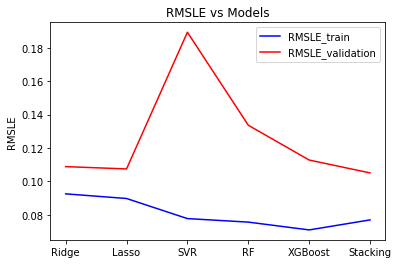

In [42]:
# plot for the different models vs scores    
_=plt.plot(['Ridge','Lasso','SVR','RF','XGBoost','Stacking'], rmsle_train, c = 'b', label = 'RMSLE_train')
_=plt.plot(['Ridge','Lasso','SVR','RF','XGBoost','Stacking'], rmsle_val, c = 'r', label = 'RMSLE_validation')
_=plt.legend(loc = 'upper right')
_=plt.ylabel('RMSLE')
_=plt.title('RMSLE vs Models')

From above analysis, we can see that even though RandomForest and XGBoost give us better scores for the training data, their performance are actually worse than the sample Ridge regression when trying to predict the data it never saw before (the validation data). This indicates that both RandomForest and XGBoost overfit the training data. On the other hand, the Stacking Regressor give us best cross validation score as well as validation score. We will choose it for final prediction

### Prediction
Use stacking regressor to predict the final result. Here we will re-train the model again using the all the available data instead of X_train and y_train alone. 

In [43]:
# train the stacking regressor with full data
stacking.fit(X,y)

StackingRegressor(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                  estimators=[('ridge',
                               Pipeline(memory=None,
                                        steps=[('scaler',
                                                StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)),
                                               ('ridge',
                                                Ridge(alpha=200, copy_X=True,
                                                      fit_intercept=True,
                                                      max_iter=None,
                                                      normalize=False,
                                                      random_state=None,
                                                      solver='auto',
                                                     

In [44]:
# predict the final result
test = full_set_1hot[full_set_1hot.SalePrice.isnull()]
X_test = test.drop('SalePrice',axis=1).values
log_y_pred = stacking.predict(X_test)
y_pred = np.expm1(log_y_pred)

### For Kaggle submission

In [45]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = y_pred
submission.to_csv('submission.csv', index=False)